# Domácí úkol 2
## 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.
### Načtení souborů:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('seaborn-darkgrid')

f1 = open('../source/011.txt', 'r')
f2 = open('../source/006.txt', 'r')
f1_lines = f1.readlines()[1:]   # Read lines except the first one
f2_lines = f2.readlines()[1:]   # Read lines except the first one

### Střední hodnota a rozptyl délek slov:

Pro určení střední hodnoty a rozptylu použijeme níže uvedené bodové odhady (pro samotný výpočet použijeme funkce z knihovny numpy).

* Výběrový průměr (bodový odhad střední hodnoty), který je určen následujícím vztahem:
$$\bar{X}_n = \frac{1}{n} \sum_{i = 1}^{n} X_i.$$

* Výběrový rozptyl (bodový odhad rozptylu), který je určen následujícím vztahem:
$$s_{n}^{2} = \frac{1}{n - 1} \sum_{i = 1}^{n} (X_i - \bar{X}_n)^2.$$

In [2]:
def words_length(lines) -> list[int]:
    # Split lines to words
    words = []
    for l in lines:
        words.extend(len(word) for word in l.split())
    return words

X1 = np.array(words_length(f1_lines))
n1 = X1.shape[0]
xbar1 = X1.mean()
s21 = pow(X1.std(ddof=1), 2) # ddof=1 dává nestranný odhad 1/(n-1)*sum((X-mu)**2)

X2 = np.array(words_length(f2_lines))
n2 = X2.shape[0]
xbar2 = X2.mean()
s22 = pow(X2.std(ddof=1), 2)

print('První text {}:'.format(f1.name))
print('Celkem slov = %d\nStřední hodnota = %.5f\nRozptyl = %.5f' %(n1,xbar1,s21))
print('-'*50)
print('Druhý text {}:'.format(f2.name))
print('Celkem slov = %d\nStřední hodnota = %.5f\nRozptyl = %.5f' %(n2,xbar2,s22))

První text ../source/011.txt:
Celkem slov = 1260
Střední hodnota = 3.86032
Rozptyl = 4.53965
--------------------------------------------------
Druhý text ../source/006.txt:
Celkem slov = 1140
Střední hodnota = 4.10965
Rozptyl = 4.33301


### Rozdělení délek slov:
Následující dva grafy ukazují rozdělení délek slov pro oba testované soubory, tj. napočítané četnosti délek slov. V grafech je červeně zvýrazněn bodový odhad střední hodnoty.

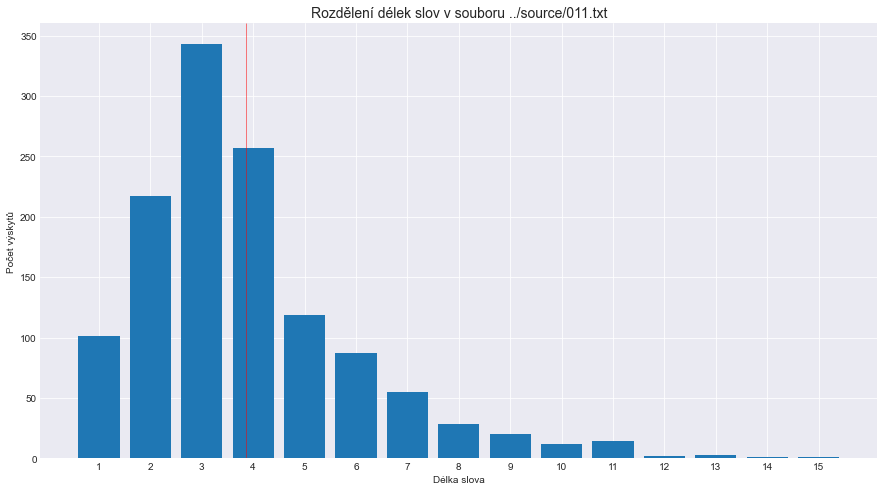

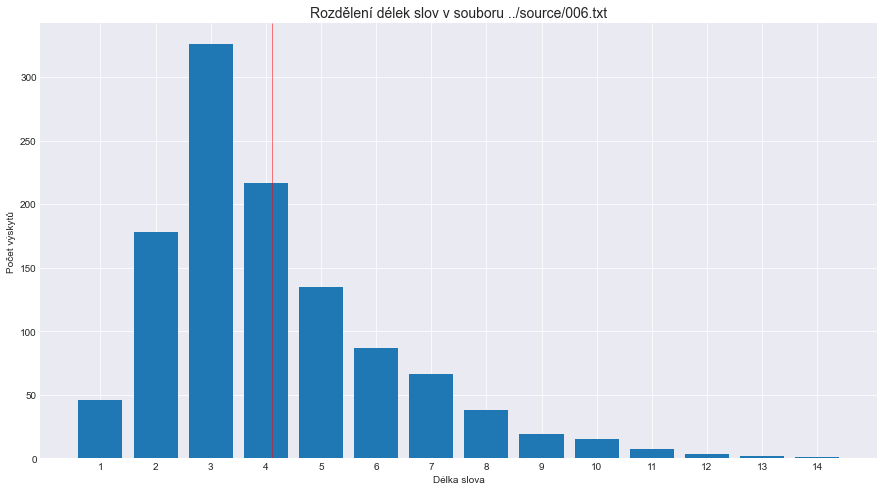

In [3]:
def create_distribution(data):
    w_lengths = {}
    for w_len in data:
        if w_len in w_lengths:
            w_lengths[w_len] += 1
        else:
            w_lengths[w_len] = 1

    return [(k, v) for k, v in sorted(w_lengths.items(), key=lambda item: item[0], reverse=False)]

def plot_word_lengths(data, filename, mean):
    plt.xlabel('Délka slova')
    plt.ylabel('Počet výskytů')
    x_values = range(len(data))
    plt.bar(x_values, [v for k, v in data])
    plt.xticks(x_values, [k for k, v in data])
    plt.title('Rozdělení délek slov v souboru {}'.format(filename), fontsize=14)

    # Highlight mean value
    plt.axvspan(xmin=mean - 1, xmax=mean - 1, color='red', alpha=0.5)

    plt.show()

word_len_dist1 = create_distribution(X1)
plot_word_lengths(word_len_dist1, f1.name, xbar1)
word_len_dist2 = create_distribution(X2)
plot_word_lengths(word_len_dist2, f2.name, xbar2)

## 2. Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Pro každý soubor zvlášť projdeme načtený text (první řádka má být dle zadání ignorována) a spočítáme výskyty jednotlivých písmen. Pravděpodobnosti pro jednotlivá písmena poté získáme následujícím bodovým odhadem:
$$p_i = \frac{\text{počet výskytů i-tého písmene}}{\text{celkový počet písmen}},$$
kde $p_i$ je pravděpodobnost i-tého písmene.

In [4]:
def get_chars(lines):
    # Parse lines to characters
    chars = []
    for l in lines:
        chars.extend(c for c in l)

    return chars


def letter_probabilities(chars) -> list[tuple[str, float]]:
    # Count letters occurrences
    letters_count = 0
    occ = {}
    for c in chars:
        if not c.isspace():
            letters_count += 1
            if c in occ:
                occ[c] += 1
            else:
                occ[c] = 1

    # Count letter probabilities
    probabilities = {}
    for c, count in occ.items():
        probabilities[c] = count / letters_count

    # Sort and return probabilities
    return [(k, v) for k, v in sorted(probabilities.items(), key=lambda item: item[1], reverse=True)]

chars1 = get_chars(f1_lines)
probabilities1 = letter_probabilities(chars1)
chars2 = get_chars(f2_lines)
probabilities2 = letter_probabilities(chars2)
print('Pravděpodobnosti jednotlivých písmen v textu {} jsou:\n{}'.format(f1.name, probabilities1))
print('-'*50)
print('Pravděpodobnosti jednotlivých písmen v textu {} jsou:\n{}'.format(f2.name, probabilities2))

Pravděpodobnosti jednotlivých písmen v textu ../source/011.txt jsou:
[('e', 0.11122532894736842), ('t', 0.09724506578947369), ('o', 0.09046052631578948), ('a', 0.07401315789473684), ('h', 0.06681743421052631), ('n', 0.06476151315789473), ('i', 0.06188322368421053), ('s', 0.06147203947368421), ('r', 0.05345394736842105), ('d', 0.04954769736842105), ('l', 0.04009046052631579), ('u', 0.03186677631578947), ('m', 0.031044407894736843), ('y', 0.02549342105263158), ('w', 0.02446546052631579), ('f', 0.020764802631578948), ('c', 0.019120065789473683), ('g', 0.01768092105263158), ('p', 0.01665296052631579), ('b', 0.016241776315789474), ('k', 0.01274671052631579), ('v', 0.008634868421052632), ('j', 0.0024671052631578946), ('x', 0.0010279605263157894), ('q', 0.0006167763157894736), ('z', 0.00020559210526315788)]
--------------------------------------------------
Pravděpodobnosti jednotlivých písmen v textu ../source/006.txt jsou:
[('e', 0.1304162219850587), ('t', 0.08196371398078975), ('n', 0.0783

### Zobrazení získaných praděpodobností písmen pomocí grafů:

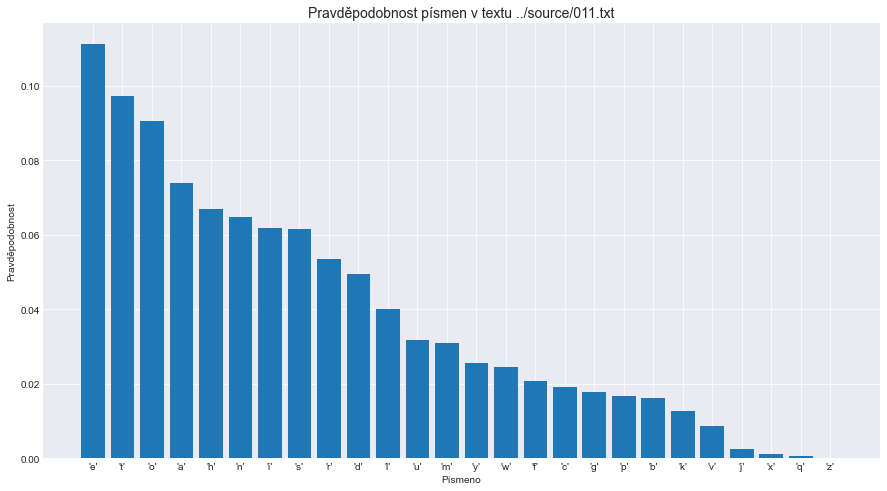

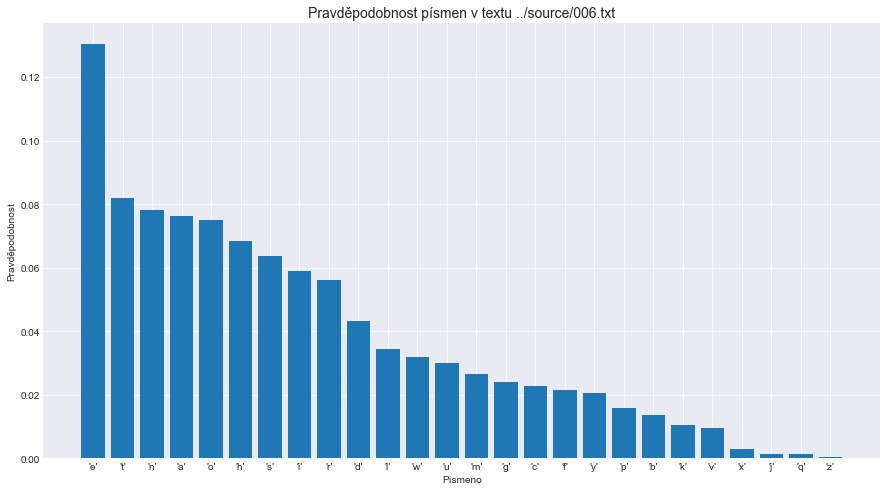

In [5]:
def plot_probabilities(data, filename):
    plt.xlabel('Písmeno')
    plt.ylabel('Pravděpodobnost')
    x_values = range(len(data))
    plt.bar(x_values, [probability for char, probability in data])
    plt.xticks(x_values, ['\'{}\''.format(char) for char, probability in data])
    plt.title('Pravděpodobnost písmen v textu {}'.format(filename), fontsize=14)
    plt.show()

plot_probabilities(probabilities1, f1.name)
plot_probabilities(probabilities2, f2.name)

In [6]:
# auxiliary methods for tasks 3 and 5

def create_contingency_table(data1, data2):
    N_lengths = []
    N = [[], []]
    for k1, v1 in data1:
        N_lengths.append(k1)
        N[0].append(v1)
        found_in_second = False
        for k2, v2 in data2:
            if k1 == k2:
                N[1].append(v2)
                found_in_second = True
                break
        if not found_in_second:
            N[1].append(0)

    for k2, v2 in data2:
        if k2 not in N_lengths:
            N_lengths.append(k2)
            N[1].append(v2)
            N[0].append(0)

    return N

def merge_bins(N):
    n = np.sum(N)
    p_i = np.array([np.sum(N, axis = 1)/n])
    p_j = np.array([np.sum(N, axis = 0)/n])

    npp = (np.matmul(p_i.reshape((-1,1)), p_j) * n).tolist()

    # Merge bins with values < 5
    tmp = [[0, 0], [0, 0]]
    indexes_to_remove = []
    for i in range(p_j.size):
        # Check if this column contains value < 5
        if npp[0][i] < 5 or npp[1][i] < 5:
            # If so, add value of theoretical and real frequencies to tmp variable
            for j in range(2):
                tmp[j][0] += npp[j][i]
                tmp[j][1] += N[j][i]
            indexes_to_remove.append(i)

            # If added theoretical frequencies are above 5, append them and real freq. to the end of list
            if tmp[0][0] >= 5 and tmp[1][0] >= 5:
                for j in range(2):
                    npp[j].append(tmp[j][0])
                    N[j].append(tmp[j][1])
                    tmp[j] = [0, 0]

    # Delete items with values < 5 from the list
    for index in sorted(indexes_to_remove, reverse=True):
        for j in range(2):
            del npp[j][index]
            del N[j][index]

    # Add remaining tmp value to lowest number in list
    if tmp[0][0] < tmp[1][0]:
        min_val_index = npp[0].index(min(npp[0]))
    else:
        min_val_index = npp[1].index(min(npp[1]))
    N[0][min_val_index] += tmp[0][1]
    N[1][min_val_index] += tmp[1][1]

    return N

## 3. Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.
Tento test provedeme pomocí kontingenční tabulky. Tato tabulka bude obsahovat 2 řádky (1 řádek odpovídá 1 souboru) a počet sloupců odpovídající počtu různých délek slov z obou souborů. Tuto kontingenční tabulku budeme označovat symbolem $N$.

Kontingenční tabulka bude obsahovat naměřený počet výskytů jednotlivých délek slov (četností). Na základě hodnot v této tabulce sestrojíme matici teoretických četností a zkontrolujeme, že pro každou teoretickou četnost platí, že je $\geq 5$. Pokud tato podmínka neplatí, tak některé sloupce sloučíme, tak aby podmínka byla splněna.

Na základě zadání úkolu chceme ověřit nezávislost rozdělení délek slov. Dostáváme tedy následující hypotézy:
* $H_0: p_{ij} = p_{i{\large \bullet}} p_{{\large \bullet}j} $
* $H_A: p_{ij} \neq p_{i{\large \bullet}} p_{{\large \bullet}j} $

Pro výpočet testové statistiky $\chi^2$ se používá následující vztah:
$$\chi^2 = \sum_{i=1}^{r}\sum_{j=1}^{c}\frac{(N_{ij} - \frac{N_{i{\large \bullet}} N_{{\large \bullet}j}}{n})^2}{\frac{N_{i{\large \bullet}} N_{{\large \bullet}j}}{n}}.$$

Počet stupňů volnosti (zkráceně $dof$) je pak určen jako $(r - 1)(c - 1)$, kde $r$ je počet řádek a $c$ počet sloupců.
Hypotézu $H_0$ pak zamítáme, pokud platí:
$$\chi^2 \geq \chi_{\alpha,dof}^{2}.$$

Pro výpočet testové statistiky a p-hodnoty použijeme již existující funkci z knihovny numpy.

In [7]:
alpha = 0.05
N = create_contingency_table(word_len_dist1, word_len_dist2)
N = merge_bins(N)

s, p, dof, _ = stats.chi2_contingency(N, correction = False)

print("\nHypotézu H\N{SUBSCRIPT ZERO} zamítáme: ", s >= stats.chi2.isf(alpha, dof))

print("Hodnota testové statistiky: ", s)
print("p-hodnota:", p)


Hypotézu H₀ zamítáme:  True
Hodnota testové statistiky:  28.600136312835666
p-hodnota: 0.0026176022005699687


## 4. Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.
Označme střední délku slov prvního textu standardně $\mu_1$ a druhého textu $\mu_2$.
Jelikož chceme testovat střední délku slov získanou ze dvou různých textů (souborů), tak použijeme dvouvýběrový t-test a budeme předpokádat různé rozptyly (nebylo nám explicitně sděleno, že jsou stejné rozptyly a proto budeme raději předpokládat, že nejsou stejné).

Hypotézy tedy vypadají následovně:
* $H_0: \mu_1 = \mu_2$
* $H_A: \mu_1 \neq \mu_2$

Hypotézu $H_0$ pak zamítáme, pokud platí:
$$|T| \geq t_{\alpha/2, n_d}.$$

Vzorce:
* pro testovou statistiku $T$:
$$T = \frac{\bar{X}_n - \bar{Y}_m}{s_d}$$
* počet stupňů volnosti ($n_d$):
$$n_d = \frac{s_d^4}{\frac{1}{n - 1} (\frac{s_{X}^{2}}{n})^2 + \frac{1}{m - 1} (\frac{s_{Y}^{2}}{m})^2}$$
* výpočet hodnoty $s_d$:
$$s_d = \sqrt{\frac{s_{X}^{2}}{n} + \frac{s_{Y}^{2}}{m}}$$

Pro výpočet testové statistiky a p-hodnoty použijeme již existující funkci z knihovny numpy.

In [8]:
alpha = 0.05
dof = n1 + n2 - 2
t_alpha_n = stats.t.isf(alpha / 2,dof)

T,p = stats.ttest_ind(X1,X2,equal_var = False)

print('Počet stupňů volnosti:', dof)
print('Kritická hodnota studentova rozdělení: %.4f' % t_alpha_n)
print('T = %.4f, p-hodnota = %.4f' % (T, p))

print('\n|T| > t_alpha_n:', abs(T) > t_alpha_n)
print('Hypotézu H\N{SUBSCRIPT ZERO} zamítáme:', abs(T) > t_alpha_n)

Počet stupňů volnosti: 2398
Kritická hodnota studentova rozdělení: 1.9610
T = -2.8977, p-hodnota = 0.0038

|T| > t_alpha_n: True
Hypotézu H₀ zamítáme: True


## 5. Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.
Tento test provedeme také pomocí kontingenční tabulky. Postup je totožný s postupem uvedeným v úloze 3. V této úloze pouze vyměníme sloupce s délkami slov za písmena.

In [9]:
letter_dist1 = create_distribution(chars1)
letter_dist2 = create_distribution(chars2)

N = create_contingency_table(letter_dist1, letter_dist2)
N = merge_bins(N)

alpha = 0.05
s, p, dof, _ = stats.chi2_contingency(N, correction = False)

print("Hypotézu H\N{SUBSCRIPT ZERO} zamítáme: ", s >= stats.chi2.isf(alpha, dof))

print("Hodnota testové statistiky: ", s)
print("p-hodnota:", p)


Hypotézu H₀ zamítáme:  True
Hodnota testové statistiky:  58.77363761344297
p-hodnota: 0.0001539556624028747
